<h3>Data loading</h3>

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

m = len(train_labels)
m_test = len(test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<h3>Network architecture</h3>

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
# Convolution and Pooling layers
network.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
network.add(layers.MaxPooling2D(2, 2))
# Fully connected layers
network.add(layers.Flatten())
network.add(layers.Dense(128, activation = 'relu'))             # 512 bcoz it is 256*2
network.add(layers.Dense(10, activation = 'softmax'))

# Compile
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<h3>Data preprocessing</h3>

In [5]:
n1 = train_images[0].shape[0]
n2 = train_images[0].shape[1]
train_images.dtype

dtype('uint8')

In [6]:
train_images = train_images.reshape((m, n1, n2, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((m_test, n1, n2, 1))
test_images = test_images.astype('float32')/255

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<h3>Cross Validation</h3>

In [8]:
x_cval = train_images[:10000]
y_cval = train_labels[:10000]

x_train = train_images[10000:]
y_train = train_labels[10000:]

<h3>Model Training</h3>

In [9]:
results = network.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_cval, y_cval)) # 128 bcoz it is 256/2

Epoch 1/20
391/391 [==============================] - 21s 50ms/step - loss: 0.2706 - accuracy: 0.9182 - val_loss: 0.1496 - val_accuracy: 0.9559
Epoch 2/20
391/391 [==============================] - 19s 48ms/step - loss: 0.0767 - accuracy: 0.9783 - val_loss: 0.0655 - val_accuracy: 0.9805
Epoch 3/20
391/391 [==============================] - 19s 49ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 4/20
391/391 [==============================] - 20s 50ms/step - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.0550 - val_accuracy: 0.9832
Epoch 5/20
391/391 [==============================] - 19s 48ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0545 - val_accuracy: 0.9836
Epoch 6/20
391/391 [==============================] - 19s 49ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0597 - val_accuracy: 0.9834
Epoch 7/20
391/391 [==============================] - 20s 50ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0510 - val_accuracy:

In [10]:
History = results.history
History.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h3>Plotting the Training and Validation loss and accuracy</h3>

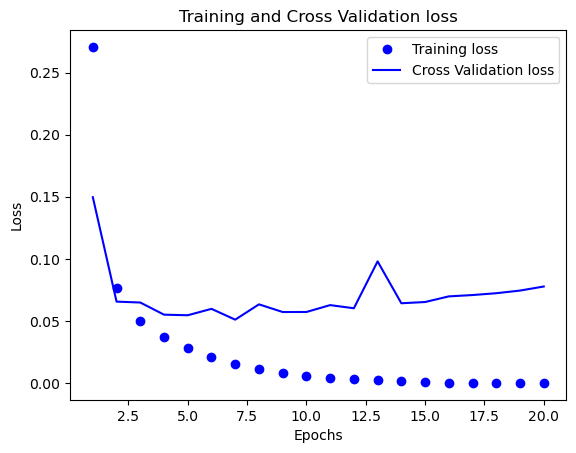

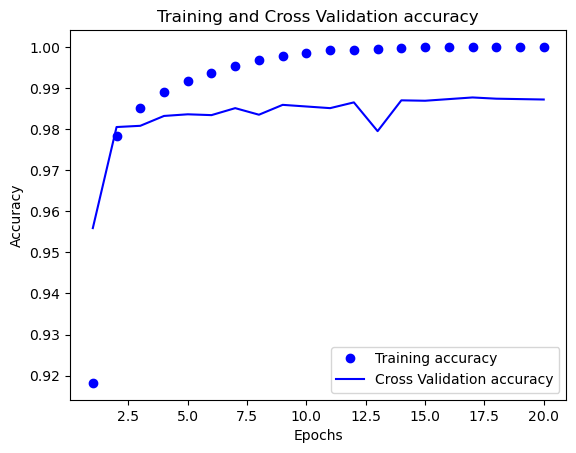

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(History['loss']) + 1)

# Training and Cross Validation loss
plt.plot(epochs, History['loss'], 'bo', label = 'Training loss')
plt.plot(epochs, History['val_loss'], 'b', label = 'Cross Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Cross Validation loss')
plt.legend()

plt.show()
plt.clf()


# Training and Cross Validation accuracy
plt.plot(epochs, History['accuracy'], 'bo', label = 'Training accuracy')
plt.plot(epochs, History['val_accuracy'], 'b', label = 'Cross Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Cross Validation accuracy')
plt.legend()

plt.show()
plt.clf()

<h3>Retraining the model</h3>

In [12]:
model = models.Sequential()
# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 17s 35ms/step - loss: 0.2409 - accuracy: 0.9289
Epoch 2/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0722 - accuracy: 0.9792
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0472 - accuracy: 0.9855
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 5/5
469/469 [==============================] - 18s 37ms/step - loss: 0.0253 - accuracy: 0.9928


<h3>Evaluating on Test data</h3>

In [13]:
test_results = model.evaluate(test_images, test_labels)
test_results

313/313 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9847


[0.0469818189740181, 0.9847000241279602]

<h3>Evaluating on Random Handwritten numbers</h3>

In [14]:
(A, B), (C, D) = mnist.load_data()

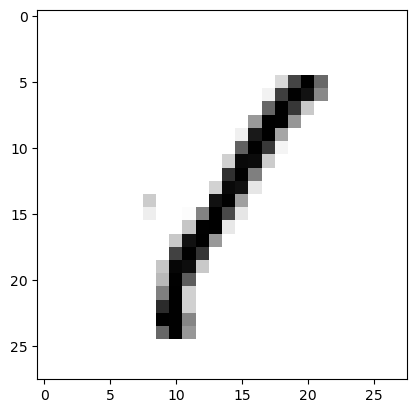

1/1 [==============================] - 0s 62ms/step
The Number is [1] with a probability of 0.99963176


<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np

X = A[58767]

plt.imshow(X, cmap = plt.cm.binary)
plt.show()

X = X.reshape((1, 28, 28, 1))
X = X.astype('float32')/255

y = model.predict(X)
y = y.ravel()

####print(y)
pred = np.where(y == y.max())
print("The Number is", pred[0], "with a probability of", y.max())

plt.clf()